In [39]:
from UZ_utils import *

import numpy as np
import cv2
from matplotlib import pyplot as plt

# Excercise 1

## Excercise 1, task (a)

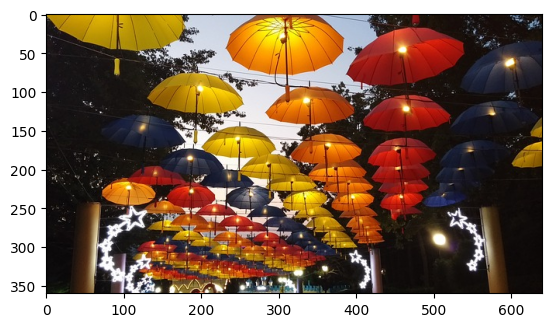

In [40]:
I = imread(".\\images\\umbrellas.jpg")
imshow(I)
height, width, channels = I.shape

## Excercise 1, task (b)

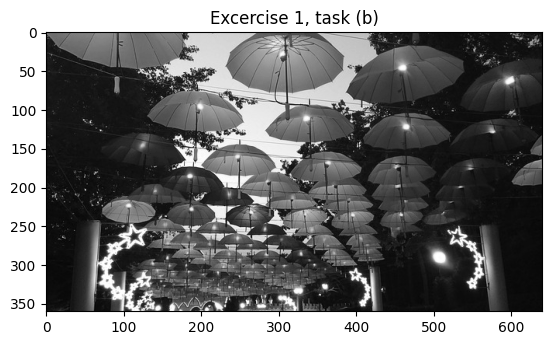

In [41]:
I_gray = np.sum(I, axis=2) / 3
plt.title("Excercise 1, task (b)")
plt.imshow(I_gray, cmap='gray')
plt.show()

## Excercise 1, task (c)

In [42]:
def cut_rectangle_monochannel(I, x: tuple, y: tuple, channel: int):
    return_array = I[x[0]:x[1], y[0]:y[1], channel]
    return return_array

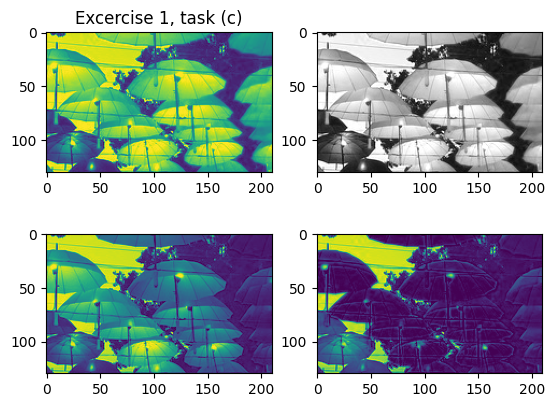

In [43]:
plt.clf()
plt.subplot(2, 2, 1)
plt.title("Excercise 1, task (c)")
I_red = cut_rectangle_monochannel(I, (130, 260), (240, 450), 0)
plt.imshow(I_red)
plt.subplot(2, 2, 2)
plt.imshow(I_red, cmap='gray')

I_green = cut_rectangle_monochannel(I, (130, 260), (240, 450), 1)
I_blue = cut_rectangle_monochannel(I, (130, 260), (240, 450), 2)
plt.subplot(2, 2, 3)
plt.imshow(I_green)
plt.subplot(2, 2, 4)
plt.imshow(I_blue)
plt.show()

## Excercise 1, task (d)

In [44]:
def invert_subimage_float_inplace(I, x: tuple, y: tuple):
    # All channels there are get inverted.
    I[x[0]:x[1], y[0]:y[1], :] = 1 - I[x[0]:x[1], y[0]:y[1], :]
    return

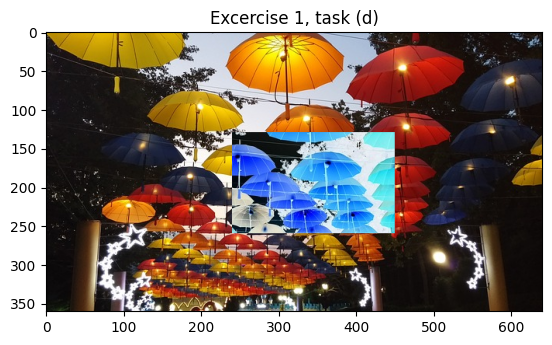

In [45]:
invert_subimage_float_inplace(I, (130, 260), (240, 450))
plt.clf()
plt.imshow(I)
plt.title("Excercise 1, task (d)")
plt.show()

## Excercise 1, task (e)

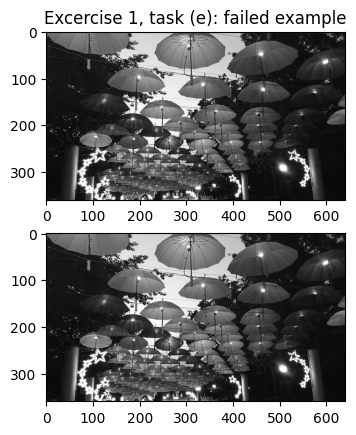

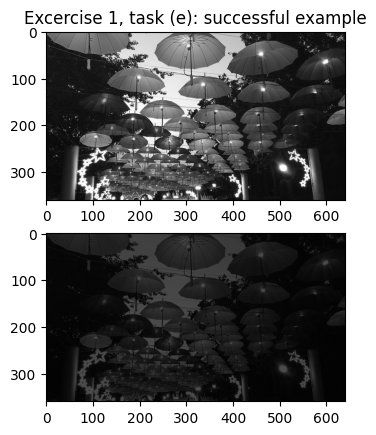

In [46]:
I_gray_reduced = I_gray * 0.3
plt.clf()
plt.subplot(2, 1, 1)
plt.title("Excercise 1, task (e): failed example")
plt.imshow(I_gray, cmap='gray')
plt.subplot(2, 1, 2)
plt.imshow(I_gray_reduced, cmap='gray')
plt.show()

plt.clf()
plt.subplot(2, 1, 1)
plt.title("Excercise 1, task (e): successful example")
plt.imshow(I_gray, vmin=0, vmax=1, cmap='gray')
plt.subplot(2, 1, 2)
plt.imshow(I_gray_reduced, vmin=0, vmax=1, cmap='gray')
plt.show()

# Excercise 2

## Excercise 2, task (a)

In [47]:
def treshold_mask(I_gray, treshold):
    I_mask = np.copy(I_gray)
    I_mask[I_gray < treshold] = 0
    I_mask[I_gray >= treshold] = 1

    return I_mask

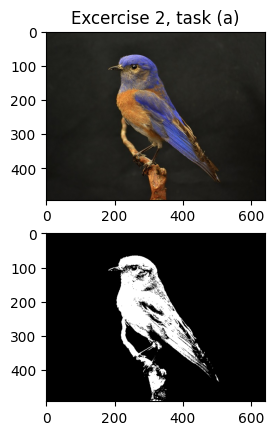

In [48]:
I_bird = imread(".\\images\\bird.jpg")
I_bird_gray = np.sum(I_bird, axis=2) / 3
treshold = 0.3
I_bird_mask = treshold_mask(I_bird_gray, treshold)

plt.clf()
plt.subplot(2, 1, 1)
plt.title("Excercise 2, task (a)")
plt.imshow(I_bird)
plt.subplot(2, 1, 2)
plt.imshow(I_bird_mask, cmap='gray')
plt.show()

## Excercise 2, task (b)

In [49]:
def myhist(I_gray, num_of_bins):
    
    # H[0] will hold the x value of the bar.
    # H[1] will hold the normalized counts for each bar (their heights).
    H = np.zeros((2, num_of_bins))
    
    pixel_vals = np.reshape(I_gray, -1)
    min = 0
    max = 1
    value_span = max - min

    divider = 1/num_of_bins
    pixel_vals = pixel_vals / divider
    pixel_vals = (np.floor(pixel_vals)).astype(int)
    # We've converted each pixel value to an integer k, where:
    # pixel value = k * divider + something less than a divider.
    # And k is also the index of the bin this pixel belonds to.


    # we need to add the divider/2 to get the mean of the column correctly,
    # not the left side (floored) of the column
    bar_values_of_pixels = [min + divider * i + divider/2 for i in range(0, num_of_bins)]
    H[0][:] = np.array(bar_values_of_pixels)


    unique_vals, counts = np.unique(pixel_vals, return_counts=True)
    for i in range(len(unique_vals)):
        if unique_vals[i] == num_of_bins:
        # just for the chance that it's exactly equal to the maximum
            H[1][num_of_bins-1] += counts[i]
        else:
            H[1][unique_vals[i]] += counts[i]

    H[1] = H[1] / np.sum(H[1])
    return H

def plot_histogram(histogram, title=""):
    plt.clf()
    
    H = histogram
    plt.subplot(1, 1, 1)
    plt.title(title)
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))
    plt.show()

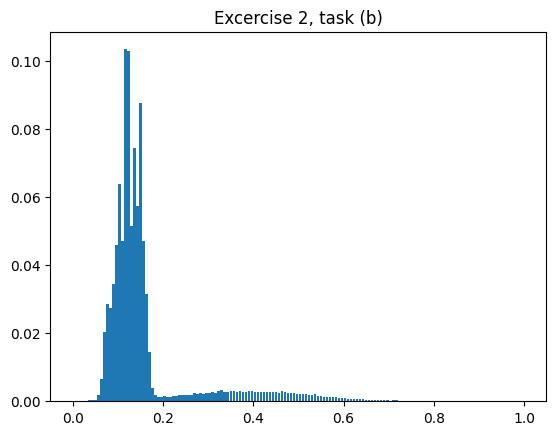

In [50]:
desired_num_of_bins = 150
bird_histogram = myhist(I_bird_gray, desired_num_of_bins)
plot_histogram(bird_histogram, "Excercise 2, task (b)")

## Excercise 2, task (c)

In [51]:
def myhist_dynamic(I_gray, num_of_bins):

    # H[0] will hold the x value of the bar.
    # H[1] will hold the normalized counts for each bar (their heights).
    H = np.zeros((2, num_of_bins))
    


    pixel_vals = np.reshape(I_gray, -1)
    max = pixel_vals.max()
    min = pixel_vals.min()
    value_span = max - min

    divider = value_span/num_of_bins
    pixel_vals = pixel_vals-min
    pixel_vals = pixel_vals / divider
    pixel_vals = (np.floor(pixel_vals)).astype(int)
    # We've converted each pixel value to an integer k, where:
    # pixel value = k * divider + something less than a divider.
    # And k is also the index of the bin this pixel belonds to.
    

    # we need to add the divider/2 to get the mean of the column correctly,
    # not the left side (floored) of the column
    bar_values_of_pixels = [min + divider * i + divider/2 for i in range(0, num_of_bins)]
    H[0][:] = np.array(bar_values_of_pixels)
    

    unique_vals, counts = np.unique(pixel_vals, return_counts=True)
    for i in range(len(unique_vals)):
    # just for the chance that it's exactly equal to the maximum
        if unique_vals[i] == num_of_bins:
            H[1][num_of_bins-1] += counts[i]
        else:
            H[1][unique_vals[i]] += counts[i]

    # normalization of the counts
    H[1] = H[1] / np.sum(H[1])

    return H

def plot_both_types_of_histograms(I_gray, num_of_bins = 100, title=""):
    plt.clf()
    
    H = myhist(I_gray, num_of_bins)
    plt.subplot(2, 1, 1)
    
    plt.title(title)
    print("Both types of histograms. Upper historgram is myhist, lower one is myhist_dynamic.")
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))
    
    H = myhist_dynamic(I_gray, num_of_bins)
    plt.subplot(2, 1, 2)
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))
    plt.show()

def show_difference_of_dynamic_myhist(title=""):
    I = np.arange(0.4, 0.7, 0.001)
    num_of_bins = 100

    plt.clf()

    H = myhist(I, num_of_bins)
    plt.subplot(2, 1, 1)
    plt.title(title)
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))

    H = myhist_dynamic(I, num_of_bins)
    plt.subplot(2, 1, 2)
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))

    plt.show()

Both types of histograms. Upper historgram is myhist, lower one is myhist_dynamic.


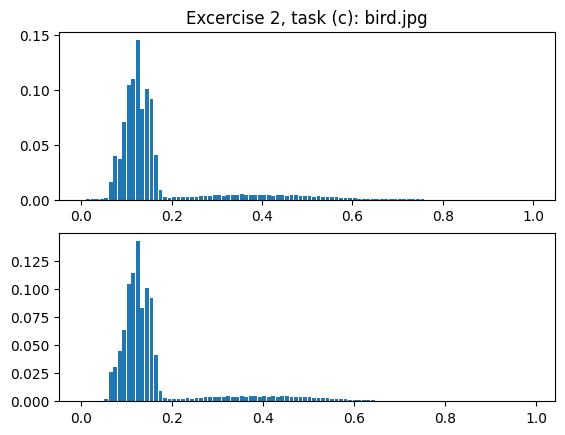

Both types of histograms. Upper historgram is myhist, lower one is myhist_dynamic.


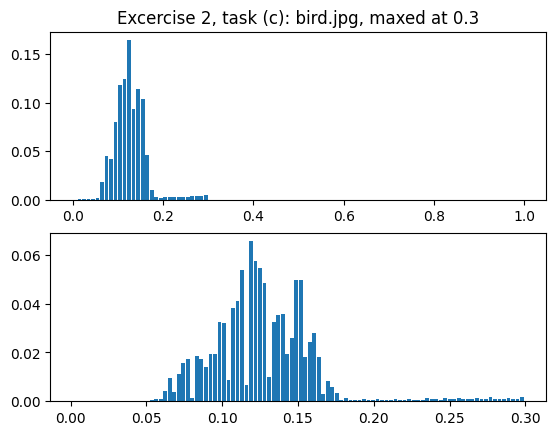

Both types of histograms. Upper historgram is myhist, lower one is myhist_dynamic.


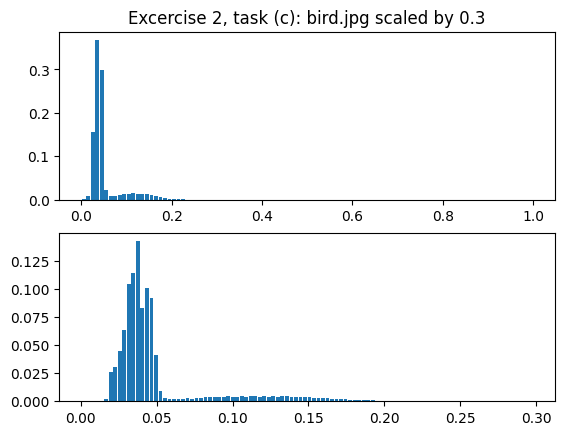

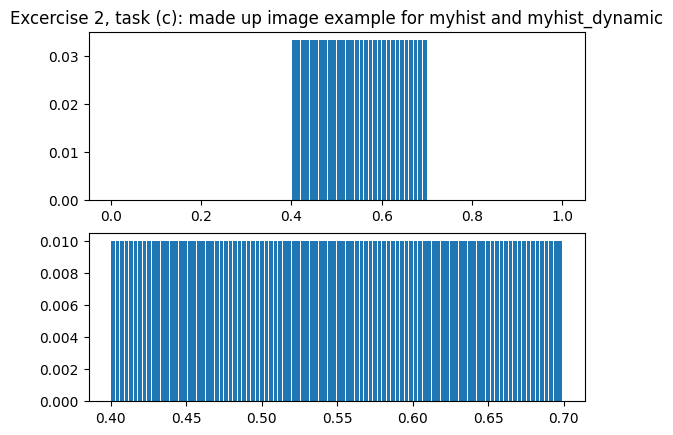

In [52]:
plot_both_types_of_histograms(I_bird_gray, 100, "Excercise 2, task (c): bird.jpg")

I_bird = imread(".\\images\\bird.jpg")
I_bird_gray = np.sum(I_bird, axis=2) / 3

I_bird_gray_demaxed = I_bird_gray[I_bird_gray < 0.3] 
plot_both_types_of_histograms(I_bird_gray_demaxed, 100, "Excercise 2, task (c): bird.jpg, maxed at 0.3")

I_bird_gray_demaxed = I_bird_gray * 0.3
plot_both_types_of_histograms(I_bird_gray_demaxed, 100, "Excercise 2, task (c): bird.jpg scaled by 0.3")
show_difference_of_dynamic_myhist("Excercise 2, task (c): made up image example for myhist and myhist_dynamic")

# Excercise 2, task (d)

In [53]:
def plot_myhist_for_3_images(list_of_3_gray_images: list, num_of_bins):
    plt.clf()
    
    image_list = list_of_3_gray_images
    
    H = myhist(image_list[0], num_of_bins)
    plt.subplot(3, 1, 1)
    plt.title("Excercise 2, task (d): num_of_bins = " + str(num_of_bins))
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))
    
    H = myhist(image_list[1], num_of_bins)
    plt.subplot(3, 1, 2)
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))
    
    H = myhist(image_list[2], num_of_bins)
    plt.subplot(3, 1, 3)
    plt.bar(H[0], H[1], align='center', width=((H[0][1]-H[0][0])/1.2))
    
    plt.show()

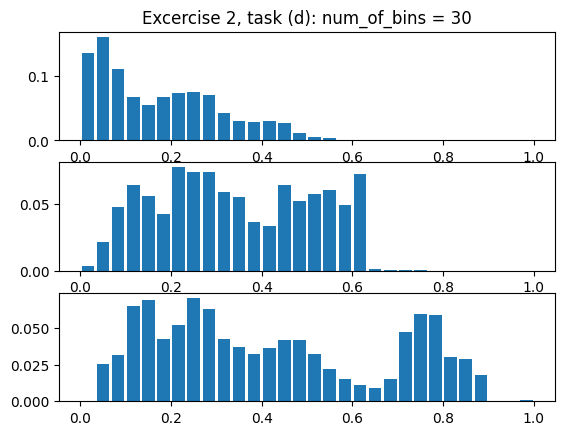

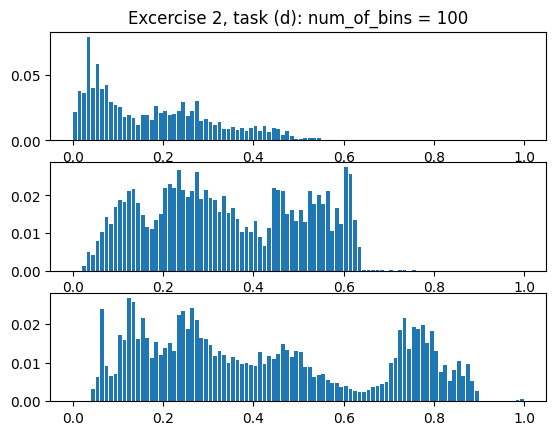

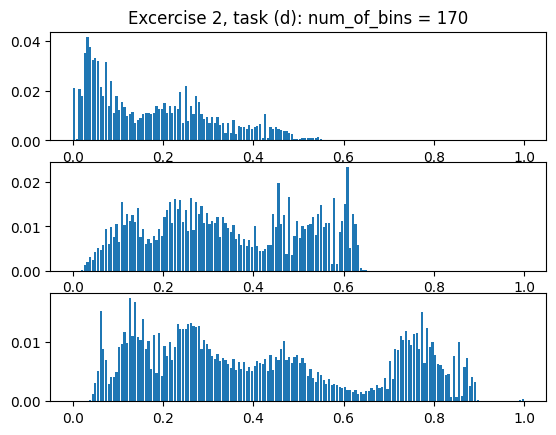

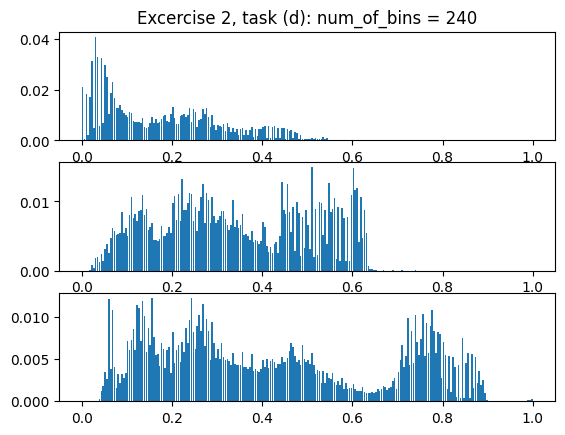

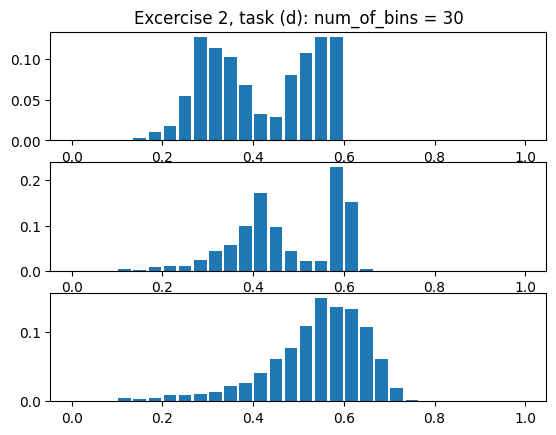

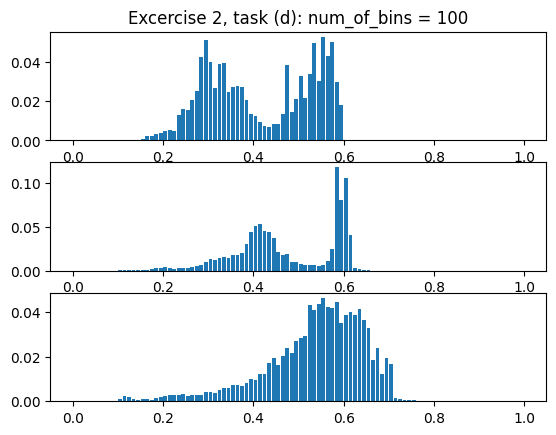

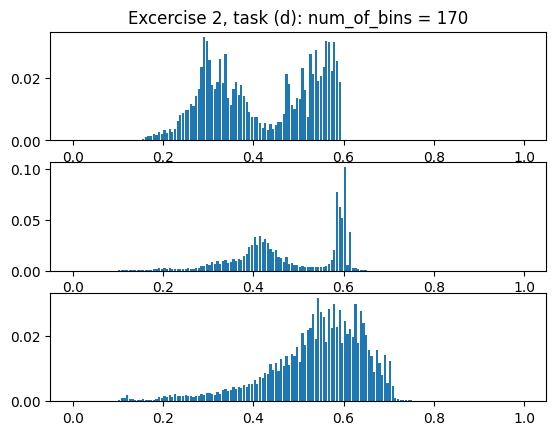

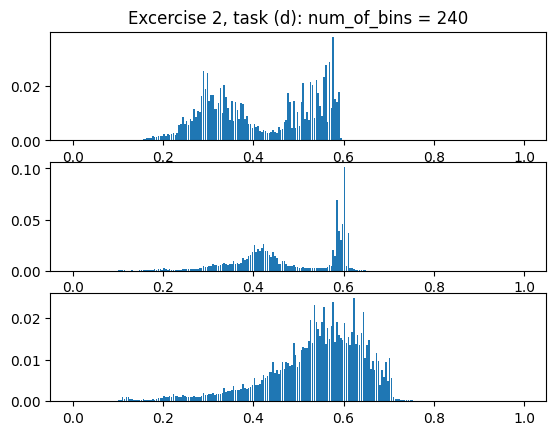

In [54]:
I1 = np.sum(imread(".\\moje_slike\\temna.jpg"), axis=2) / 3
I2 = np.sum(imread(".\\moje_slike\\srednja.jpg"), axis=2) / 3
I3 = np.sum(imread(".\\moje_slike\\svetla.jpg"), axis=2) / 3

for num_of_bins in range(30, 256, 70):
    plot_myhist_for_3_images([I1, I2, I3], num_of_bins)

I1 = np.sum(imread(".\\moje_slike\\temna_cedevita.jpg"), axis=2) / 3
I2 = np.sum(imread(".\\moje_slike\\srednja_cedevita.jpg"), axis=2) / 3
I3 = np.sum(imread(".\\moje_slike\\svetla_cedevita.jpg"), axis=2) / 3

for num_of_bins in range(30, 256, 70):
    plot_myhist_for_3_images([I1, I2, I3], num_of_bins)

# Excercise 2, task (e)

In [55]:
def otsu_get_bin(H):
    # Returns the index of the first bin on the right side of the divide.
    # Returns in the range 1 to (num_of_bins-1).
    
    num_of_bins = H.shape[1]
    max_var_between = -1
    best_T = -1
    for T in range(1, num_of_bins):

        background_percentage = np.sum(H[1][0:T])
        foreground_percentage = np.sum(H[1][T:])

        background_weighted_values = H[0][0:T] * H[1][0:T]
        foreground_weighted_values = H[0][T:] * H[1][T:]

        background_mean = np.sum(background_weighted_values)/background_percentage
        foreground_mean = np.sum(foreground_weighted_values)/foreground_percentage


        var_between = background_percentage * foreground_percentage * (background_mean - foreground_mean)**2
        
        if var_between > max_var_between:
            max_var_between = var_between
            best_T = T
    
            
    return best_T

def otsu_get_bin2(H, num):
    
    num_of_bins = H.shape[1]
    max_var_between = -1000
    best_T = -1

    # denormalizing H
    H[1] = H[1]*num

    for T in range(1, num_of_bins):


        # These are the number of pixels in the background / all pixels and likewise for foreground. 
        background_numerus = np.sum(H[1][0:T]) # / T
        foreground_numerus = np.sum(H[1][T:]) # / (num-T)

        background_percentage = background_percentage / num
        foreground_percentage = foreground_numerus / num

        background_weighted_values = H[0][0:T] * H[1][0:T]
        foreground_weighted_values = H[0][T:] * H[1][T:]

        background_mean = np.sum(background_weighted_values)/background_numerus
        foreground_mean = np.sum(foreground_weighted_values)/foreground_numerus



        var_between = background_percentage * foreground_percentage * (background_mean - foreground_mean)**2
        
        if var_between > max_var_between:
            max_var_between = var_between
            best_T = T
    
    return best_T

def otsu_treshold(I_gray, num_of_bins):
    H = myhist_dynamic(I_gray, num_of_bins)
    bin = otsu_get_bin(H)
    # bin = otsu_get_bin2(H, I_gray.size)
    
    # this dinds the value that separates the bars correctly.
    # It averages the centre values of the bars between which the treshold is.
    # We can see this as: (left_upper_bar_val+divider/2 + left_upper_bar_val-divider/2)/2
    treshold = (H[0][bin] + H[0][bin-1])/2

    return treshold

def otsu_showcase(num_of_bins=256):
    
    img_names = ["umbrellas.jpg", "bird.jpg", "candy.jpg", "eagle.jpg", "mask.png"]
    for name in img_names:
        path = ".\\images\\" + name
        I = imread(path)
        I_gray = np.sum(I, axis=2) / 3
        
        plt.clf()
        plt.subplot(2, 1, 1)
        plt.title("Excercise 2, task (e): " + name)
        plt.imshow(I_gray, cmap='gray')
        
        I_mask = treshold_mask(I_gray, otsu_treshold(I_gray, num_of_bins))
        plt.subplot(2, 1, 2)
        plt.imshow(I_mask, cmap='gray')

        plt.show()



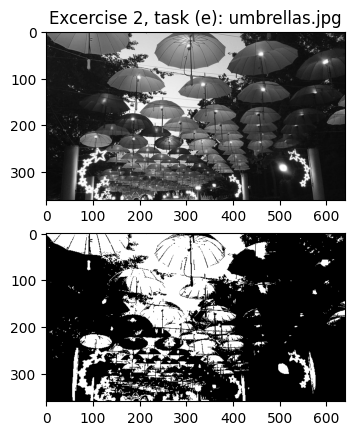

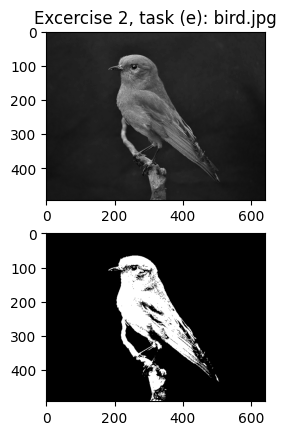

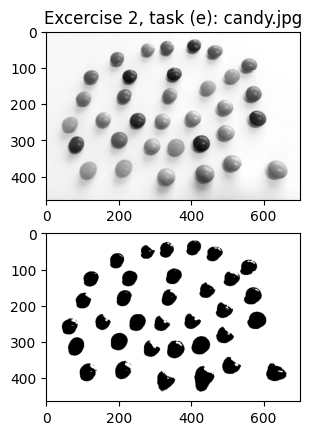

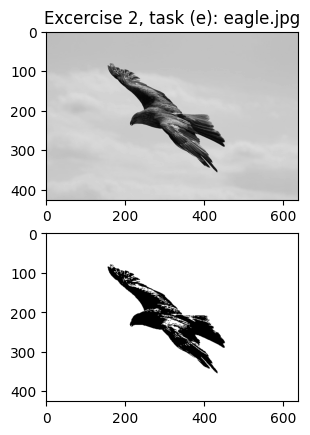

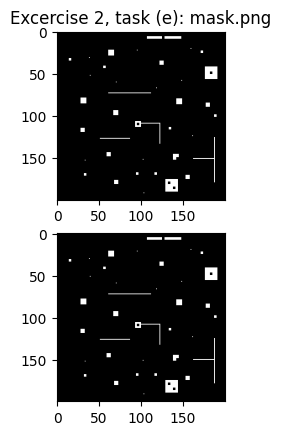

In [56]:
otsu_showcase()

# Excercise 3

# Excercise 3, task (a)

In [57]:
def erosion(I_gray, n=5):
    SE = np.ones((n,n)) # create a square structuring element
    I_eroded = cv2.erode(I_gray, SE)
    return I_eroded

def dilation(I_gray, n=5):
    SE = np.ones((n,n)) # create a square structuring element
    I_dilated = cv2.dilate(I_gray, SE)
    return I_dilated

def opening(I_gray, n=5):
    I_opened = dilation(erosion(I_gray, n), n)
    return I_opened

def closing(I_gray, n=5):
    I_closed = erosion(dilation(I_gray, n), n)
    return I_closed

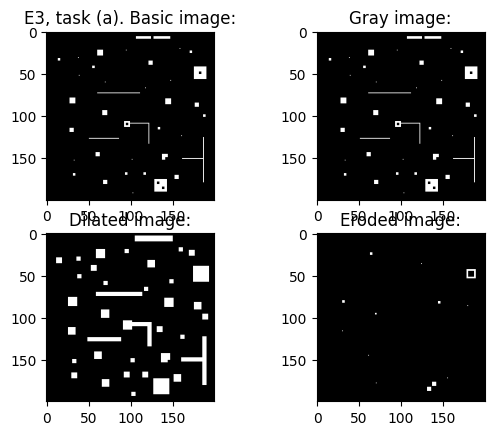

In [58]:
I_maskJpeg = imread(".\\images\\mask.png")
plt.subplot(2,2,1)
plt.title("E3, task (a). Basic image:")
plt.imshow(I_maskJpeg, cmap='gray')

I_maskJpeg_gray = np.sum(I_maskJpeg, axis=2) / 3
plt.subplot(2,2,2)
plt.title("Gray image:")
plt.imshow(I_maskJpeg_gray, cmap='gray')

I_maskJpeg_dilated = dilation(I_maskJpeg_gray)
plt.subplot(2,2,3)
plt.title("Dilated image:")
plt.imshow(I_maskJpeg_dilated, cmap='gray')

I_maskJpeg_eroded = erosion(I_maskJpeg_gray)
plt.subplot(2,2,4)
plt.title("Eroded image:")
plt.imshow(I_maskJpeg_eroded, cmap='gray')
plt.show()

# Exercise 3, task (b)

In [59]:
def erosion_ellipse(I_gray, n1=5, n2=5):
    SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n1,n2))
    I_eroded = cv2.erode(I_gray, SE)
    return I_eroded

def dilation_ellipse(I_gray, n1=5, n2=5):
    SE = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(n1,n2))
    I_dilated = cv2.dilate(I_gray, SE)
    return I_dilated

def opening_ellipse(I_gray, n1=5, n2=5):
    I_opened = dilation_ellipse(erosion_ellipse(I_gray, n1, n2), n1, n2)
    return I_opened

def closing_ellipse(I_gray, n1=5, n2=5):
    I_closed = erosion_ellipse(dilation_ellipse(I_gray, n1, n2), n1, n2)
    return I_closed

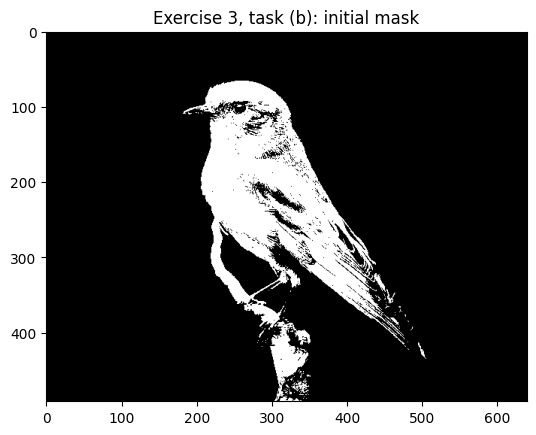

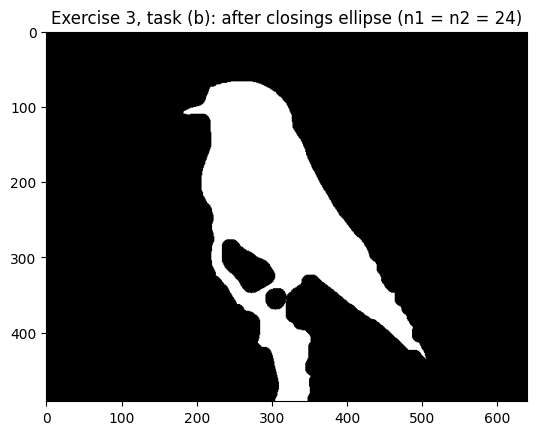

In [65]:
I_bird = imread(".\\images\\bird.jpg")
I_bird_gray = np.sum(I_bird, axis=2) / 3
I_bird_mask = treshold_mask(I_bird_gray, otsu_treshold(I_bird_gray, 256))
plt.title("Exercise 3, task (b): initial mask")
plt.imshow(I_bird_mask, cmap='gray')
plt.show()

I_bird_mask = closing_ellipse(I_bird_mask, 24, 24)
plt.title("Exercise 3, task (b): after closings ellipse (n1 = n2 = 24)")
plt.imshow(I_bird_mask, cmap='gray')
plt.show()

# Excercise 3, task (c) and (d)

In [61]:

def invert_mask(I_mask):
    new_mask = 1-I_mask[:,:]
    return new_mask

def immask(I_three_channel, I_mask):
    
    new_shape = (I_mask.shape[0], I_mask.shape[1], 3)
    I_3chan_mask = np.zeros(new_shape)
    
    for i in range(3):
        I_3chan_mask[:,:,i] = I_mask[:,:]

    I_masked_three_channel = I_three_channel * I_3chan_mask
    return I_masked_three_channel

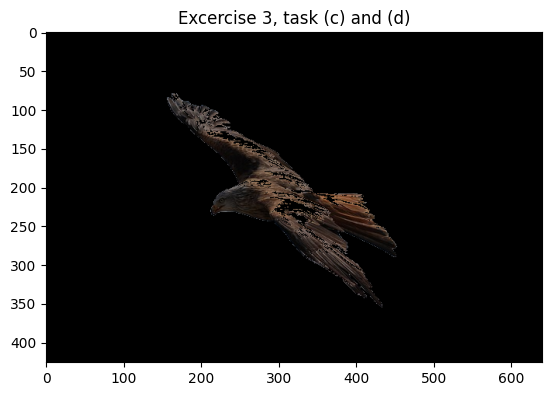

In [62]:
I_eagle = imread(".\\images\\eagle.jpg")
I_eagle_gray = np.sum(I_eagle, axis=2) / 3
I_eagle_mask = treshold_mask(I_eagle_gray, otsu_treshold(I_eagle_gray, 256))

I_eagle_mask = invert_mask(I_eagle_mask)
I_eagle_masked = immask(I_eagle, I_eagle_mask)
plt.title("Excercise 3, task (c) and (d)")
plt.imshow(I_eagle_masked)
plt.show()

# Excercise 3, task (e)

In [63]:
def immask_white_background(I_three_channel, I_mask):
    
    new_shape = (I_mask.shape[0], I_mask.shape[1], 3)
    I_3chan_mask = np.zeros(new_shape)
    
    for i in range(3):
        I_3chan_mask[:,:,i] = I_mask[:,:]
    
    white_background_mask = np.ones(new_shape) - I_3chan_mask

    I_masked_three_channel = I_three_channel * I_3chan_mask
    I_masked_three_channel = I_masked_three_channel + white_background_mask
    
    return I_masked_three_channel

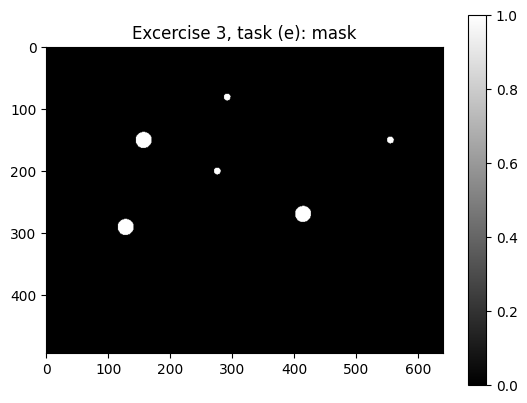

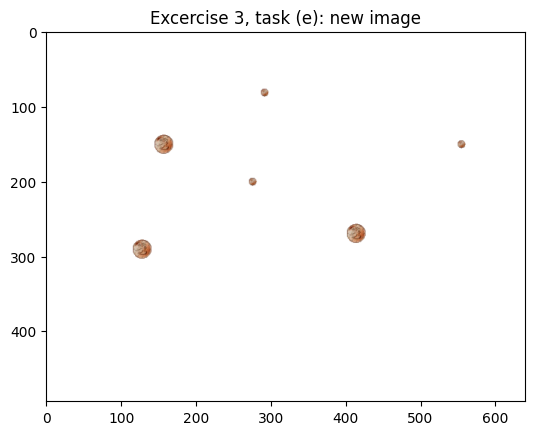

In [64]:
I_coins = imread(".\\images\\coins.jpg")
I_coins_gray = np.sum(I_coins, axis=2) / 3
I_coins_mask = treshold_mask(I_coins_gray, otsu_treshold(I_coins_gray, 256))
I_opened = opening(I_coins_mask, 7)
I_opened = opening(I_opened, 9)

I_opened = invert_mask(I_opened)

I_opened = I_opened.astype('uint8')
returned_data = cv2.connectedComponentsWithStats(I_opened)
num_of_components = returned_data[0]
labels = returned_data[1]
stats = returned_data[2]
centroids = returned_data[3]

for i in range (1, num_of_components):
    if(stats[(i, cv2.CC_STAT_AREA)] > 700):
        ix_left = stats[(i, cv2.CC_STAT_LEFT)]
        ix_right = stats[(i, cv2.CC_STAT_LEFT)] + stats[(i, cv2.CC_STAT_WIDTH)]
        ix_top = stats[(i, cv2.CC_STAT_TOP)]
        ix_bottom = stats[(i, cv2.CC_STAT_TOP)] + stats[(i, cv2.CC_STAT_HEIGHT)]
        
        # tole pa ne dela for some reason:
        # I_opened[ix_top:ix_bottom][ix_left:ix_right] = 0
        I_opened[ix_top:ix_bottom, ix_left:ix_right] = 0

        """
        stats so oblike (label, COLUMN)
        Column vrednosti so:
        CC_STAT_LEFT Python: cv.CC_STAT_LEFT
        The leftmost (x) coordinate which is the inclusive start of the bounding box in the horizontal direction.
        CC_STAT_TOP Python: cv.CC_STAT_TOP
        CC_STAT_WIDTH 
        Python: cv.CC_STAT_WIDTH
        The horizontal size of the bounding box.
        CC_STAT_HEIGHT 
        Python: cv.CC_STAT_HEIGHT
        The vertical size of the bounding box.
        CC_STAT_AREA The total area (in pixels)
        """
        

imshow(I_opened, "Excercise 3, task (e): mask")

I_small_coins = immask_white_background(I_coins, I_opened)
imshow(I_small_coins, "Excercise 3, task (e): new image")